Trying to make simulation for Andromeda

In [10]:
from rocketpy import Environment, SolidMotor, Rocket, Flight


Gravity Details

Acceleration of gravity at surface level:    9.7912 m/s²
Acceleration of gravity at  79.353 km (ASL): 9.5537 m/s²


Launch Site Details

Launch Date: 2025-10-10 12:00:00 UTC
Launch Site Latitude: 31.04434°
Launch Site Longitude: -103.53517°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 67032.58 W    3443364.25 N
Launch Site UTM zone: 13R
Launch Site Surface Elevation: 919.7 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.353 km
Forecast Time Period: from 2025-10-09 18:00:00 to 2025-10-25 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 5.35 m/s
Surface Wind Direction: 141.55°
Surface Wind Heading: 321.55°
Surface Pressure: 916.57 hPa
Surface Temperature: 293.66 K
Surface Air Density: 1.087 kg/m³
Surface Speed of Sound: 343.53 m/s


Earth Model Details

Earth Radius at Launch s

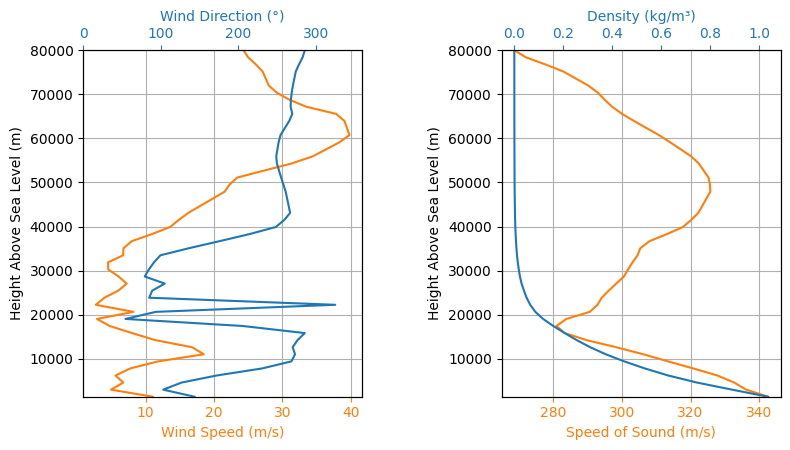

In [11]:
env = Environment(latitude=31.04434, longitude=-103.53517, elevation=1400)

import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)

env.set_atmospheric_model(type="Forecast", file="GFS")
env.info()

c:\Users\Andrew\Documents\High Power Rocket Team\RocketPy\venv\Lib\site-packages\rocketpy\motors\motor.py:990: UserWarning: burn_time argument (0, 4.136) is out of thrust source time range. Using thrust_source boundary times instead: (0, 3.51) s.
If you want to change the burn out time of the curve please use the 'reshape_thrust_curve' argument.
  warnings.warn(


Nozzle Details
Nozzle Radius: 0.03429 m
Nozzle Throat Radius: 0.01524 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1579.9 kg/m3
Grain Outer Radius: 0.04115 m
Grain Inner Radius: 0.01905 m
Grain Height: 0.147955 m
Grain Volume: 0.001 m3
Grain Mass: 0.977 kg

Motor Details
Total Burning Time: 4.136 s
Total Propellant Mass: 5.862 kg
Structural Mass Ratio: 0.133
Average Propellant Exhaust Velocity: 1778.006 m/s
Average Thrust: 2520.007 N
Maximum Thrust: 3097.947 N at 1.69 s after ignition.
Total Impulse: 10422.750 Ns



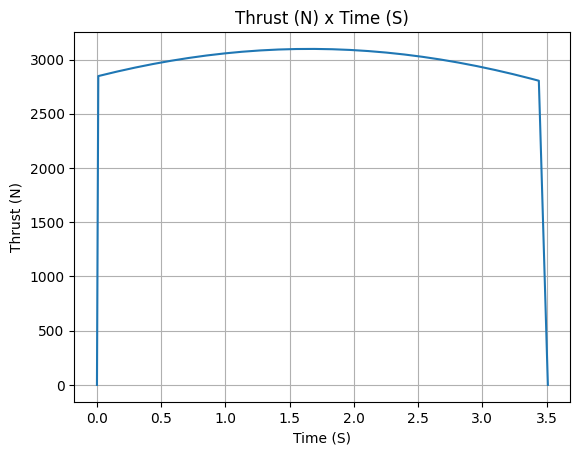

In [13]:
# Motor Definition
N3004Comp = SolidMotor(
    thrust_source = "C:/Users/Andrew/Documents/High Power Rocket Team/OpenRocket Files/NEWCOMP.eng",
    dry_mass = 0.9,
    dry_inertia = (0.475, 0.475, 0.007),
    nozzle_radius = 68.58/2000,
    grain_number = 6,
    grain_density = 1579.9,
    grain_outer_radius = 82.3 / 2000,
    grain_initial_inner_radius = 38.1 / 2000,
    grain_initial_height = 0.147955,
    grain_separation = 0,
    grains_center_of_mass_position=0.508,
    center_of_dry_mass_position=0.4826,
    nozzle_position=0,
    burn_time = 4.136,
    throat_radius = 0.01524,
    coordinate_system_orientation="nozzle_to_combustion_chamber"
)
N3004Comp.info()

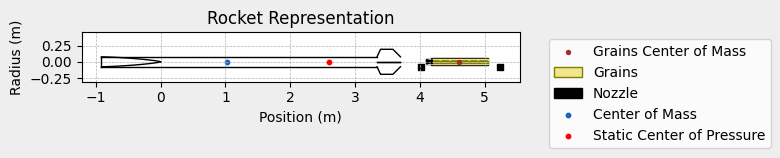

In [17]:
#Defining a Rocket
Andromeda = Rocket(
    radius = 152.4/2000,
    mass = 23.6265,
    inertia = (32.625, 32.625, 0.091),
    power_off_drag="C:/Users/Andrew/Documents/High Power Rocket Team/Thrust_OFF.csv",
    power_on_drag="C:/Users/Andrew/Documents/High Power Rocket Team/Thrust_ON.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)
Andromeda.add_motor(N3004Comp, position=4.1)

rail_buttons = Andromeda.set_rail_buttons(
    upper_button_position=2.794,
    lower_button_position = 4.0132,
    angular_position=0,
)

fin_set = Andromeda.add_trapezoidal_fins(
    n=4,
    root_chord=0.36195,
    tip_chord = 0.1905,
    span = 0.11684,
    position = 3700/1000,
    cant_angle = 0,
    sweep_angle = 45,
)

nose_cone = Andromeda.add_nose(
    length = 0.9144, kind="von karman", position = 0
)

Andromeda.draw()

In [18]:
test_flight = Flight(
    rocket = Andromeda, environment=env, rail_length=5.2, inclination=85, heading = 0
)
test_flight.info()

KeyboardInterrupt: 